In [2]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib as mpl
from datetime import timezone
import warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()

# File locations
#----------------
folder0 = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/0oxaria/gap_filling/q12021/'
aurn = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/aurn/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'

In [3]:
# House keeping to sort out inevitable date bugs :(
# Note combined in the filename means oxaria1 and oxaria2 combined
# NOT 2020 and 2021 combined
#-------------------------------------------------------------------
#oxaria_gases_s15
oxaria_gases_s15 = pd.read_feather(folder0+'oxaria_gases_stable15_536_q12021_v2.ftr')
oxaria_gases_s15['tmp'] = oxaria_gases_s15['rec'].dt.strftime('%Y-%m-%d %H:%M:%S%z')
oxaria_gases_s15['rec'] = pd.to_datetime(oxaria_gases_s15['tmp'],utc=True,errors='coerce',yearfirst=True, \
                                        infer_datetime_format=True,unit='ns',origin='unix')
oxaria_gases_s15.drop(['tmp'],inplace=True,axis=1)
oxaria_gases_s15.set_index(['tag','rec'],inplace=True)
oxaria_gases_s15.info()

FileNotFoundError: [Errno 2] No such file or directory: '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/0oxaria/gap_filling/q12021/oxaria_gases_stable15_536_q12021_v2.ftr'

In [3]:
# oxaria_pm_s15
oxaria_pm_s15 = pd.read_feather(folder0+'oxaria_pm_stable15_536_q12021.ftr')
oxaria_pm_s15['tmp'] = oxaria_pm_s15['rec'].dt.strftime('%Y-%m-%d %H:%M:%S%z')
oxaria_pm_s15['rec'] = pd.to_datetime(oxaria_pm_s15['tmp'],utc=True,errors='coerce',yearfirst=True, \
                                      infer_datetime_format=True,unit='ns')
oxaria_pm_s15.drop(['tmp'],inplace=True,axis=1)
oxaria_pm_s15.set_index(['tag','rec'],inplace=True)
oxaria_pm_s15.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 237686 entries, ('scs-bgx-536', Timestamp('2021-01-01 00:15:00+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2021-06-01 00:00:00+0000', tz='UTC'))
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   val.mtf1     237686 non-null  float32
 1   val.pm1      237686 non-null  float32
 2   val.mtf5     237686 non-null  float32
 3   val.pm2p5    237686 non-null  float32
 4   val.mtf3     237686 non-null  float32
 5   val.pm10     237686 non-null  float32
 6   val.mtf7     237686 non-null  float32
 7   val.per      237686 non-null  float32
 8   val.sfr      237686 non-null  float32
 9   val.sht.hmd  237686 non-null  float32
 10  val.sht.tmp  237686 non-null  float32
 11  val.pm10_1   169665 non-null  float32
 12  val.pm2p5_1  169665 non-null  float32
 13  val.pm1_1    169665 non-null  float32
 14  name         237686 non-null  object 
dtypes: float32(14), object(1)
memory

In [4]:
# oxaria_climate_s15
oxaria_climate_s15 = pd.read_feather(folder0+'oxaria_climate_stable15_536_q12021.ftr')
oxaria_climate_s15['tmp'] = oxaria_climate_s15['rec'].dt.strftime(
    '%Y-%m-%d %H:%M:%S%z')
oxaria_climate_s15['rec'] = pd.to_datetime(oxaria_climate_s15['tmp'],utc=True,errors='coerce',yearfirst=True, \
                                      infer_datetime_format=True,unit='ns')
oxaria_climate_s15.drop(['tmp'], inplace=True, axis=1)
oxaria_climate_s15.set_index(['tag', 'rec'], inplace=True)
oxaria_climate_s15.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 234889 entries, ('scs-bgx-536', Timestamp('2021-01-01 00:15:00+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2021-06-01 00:00:00+0000', tz='UTC'))
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   val.hmd  234889 non-null  float32
 1   val.tmp  234889 non-null  float32
 2   name     234889 non-null  object 
dtypes: float32(2), object(1)
memory usage: 5.0+ MB


In [5]:
# oxaria_status_s15
oxaria_status_s15 = pd.read_feather(folder0+'oxaria_status_stable15_536_q12021.ftr')
oxaria_status_s15['tmp'] = oxaria_status_s15['rec'].dt.strftime('%Y-%m-%d %H:%M:%S%z')
oxaria_status_s15['rec'] = pd.to_datetime(oxaria_status_s15['tmp'],utc=True,errors='coerce',yearfirst=True, \
                                          infer_datetime_format=True)
oxaria_status_s15.drop(['tmp'],inplace=True,axis=1)
oxaria_status_s15.set_index(['tag','rec'],inplace=True)
oxaria_status_s15.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 238401 entries, ('scs-bgx-536', Timestamp('2021-01-01 00:15:00+0000', tz='UTC')) to ('scs-bgx-559', Timestamp('2021-06-01 00:00:00+0000', tz='UTC'))
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   val.gps.pos:0      236441 non-null  float32
 1   val.gps.pos:1      236441 non-null  float32
 2   val.gps.elv        236441 non-null  float32
 3   val.gps.qual       237517 non-null  float32
 4   val.up.load.av15   238401 non-null  float32
 5   val.up.load.av1    238401 non-null  float32
 6   val.up.load.av5    238401 non-null  float32
 7   val.up.users       238401 non-null  float32
 8   val.psu.prot-batt  238359 non-null  float32
 9   val.psu.chg        157941 non-null  float32
 10  val.psu.standby    113888 non-null  object 
 11  val.psu.pwr-in     238359 non-null  float32
 12  val.psu.host-3v3   238359 non-null  float32
 13  val.psu.batt-flt   113888 no

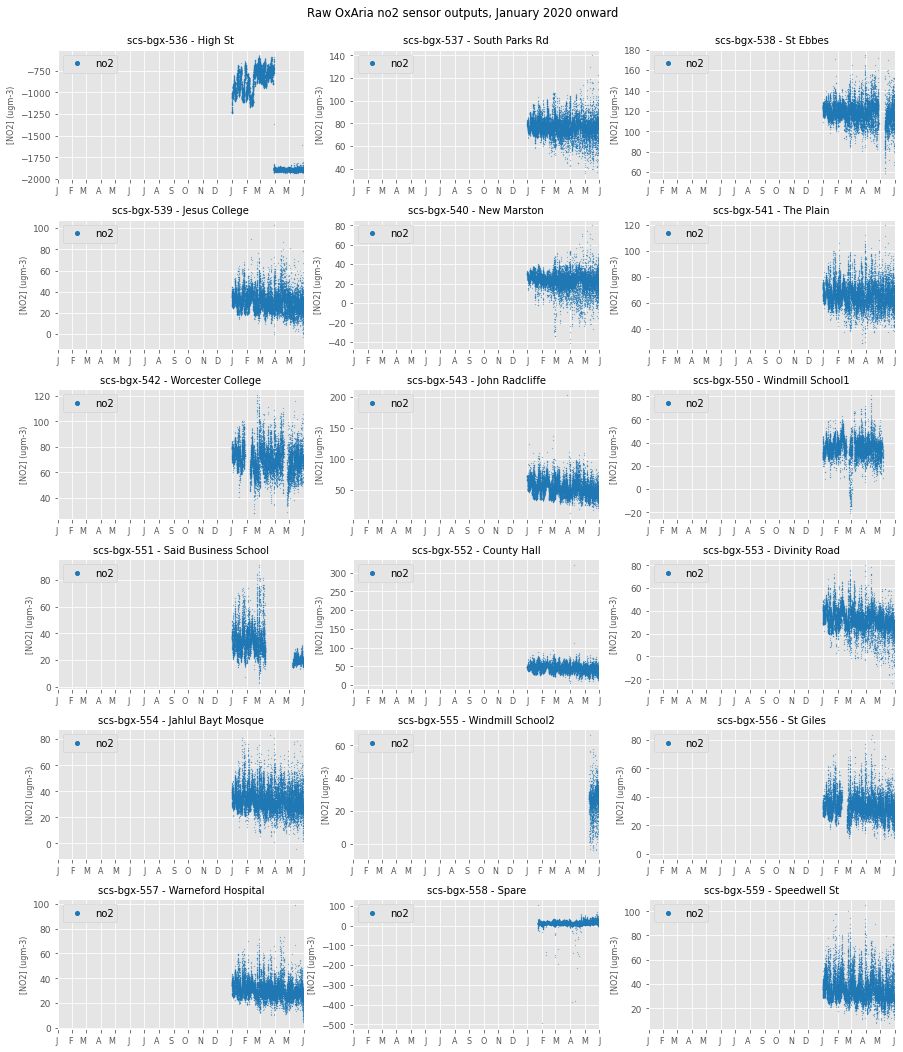

In [14]:
# NO2 plots
# -----------

plt.style.use('ggplot')

x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria no2 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria_gases_s15.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.no2.cnc_1', c='tab:blue', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='no2', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[NO2] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_no2_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

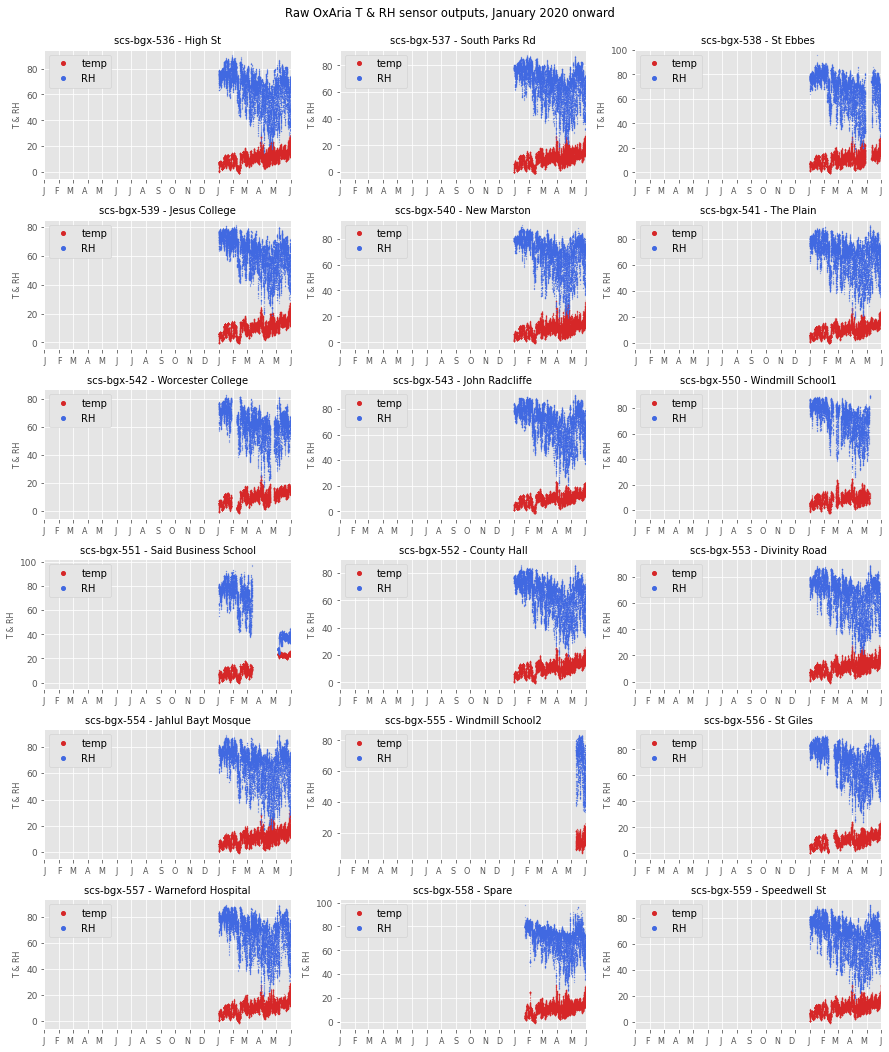

In [9]:
# NO2 plots
# -----------

plt.style.use('ggplot')

x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria T & RH sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria_gases_s15.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.sht.tmp', c='tab:red', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='temp', ax=ax, legend=True, zorder=1)
    dat.plot(y='val.sht.hmd', c='royalblue', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='RH', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('T & RH', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

#plt.savefig(pngs+'oxaria0_no2_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

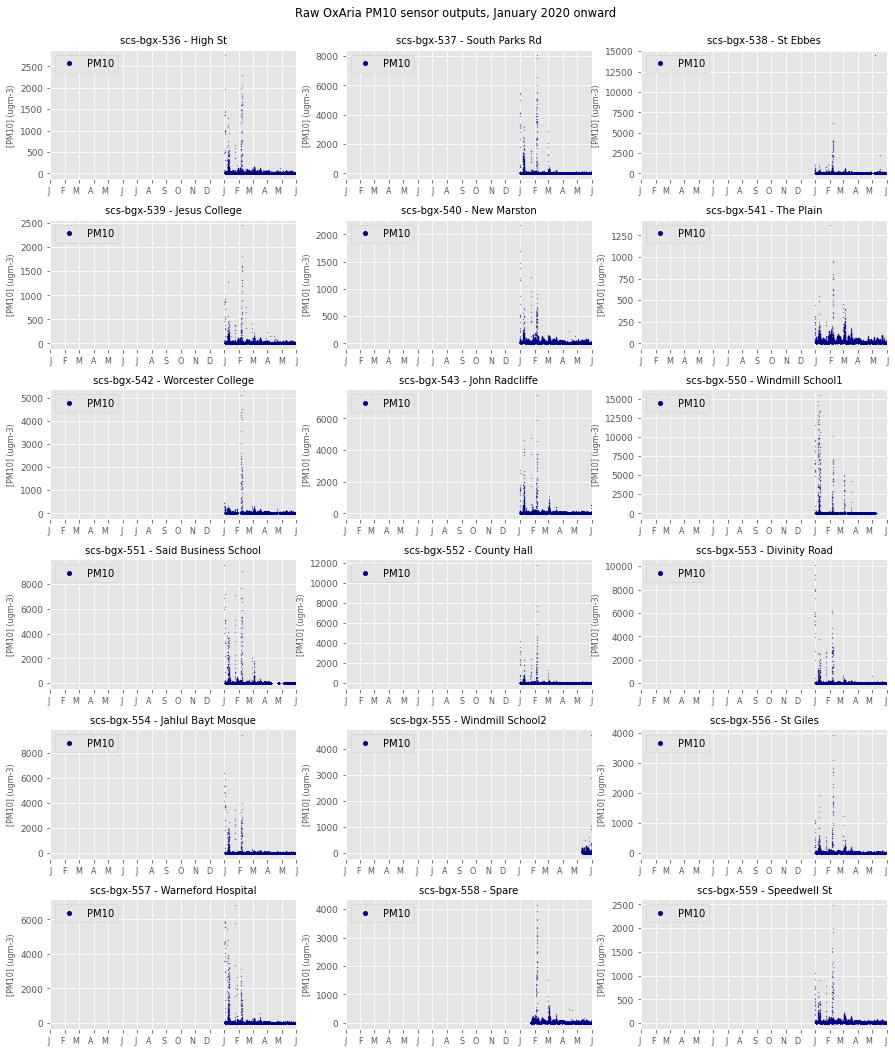

In [7]:
# PM10 plots
# -----------
plt.style.use('ggplot')

x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria PM10 sensor outputs, January 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria_pm_s15.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm10', c='navy',linewidth=0.5, marker='o', ms=0.2, ls='', \
             label='PM10', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM10] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria0_pm10_15m_raw_sensor_ts_536_q12021.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


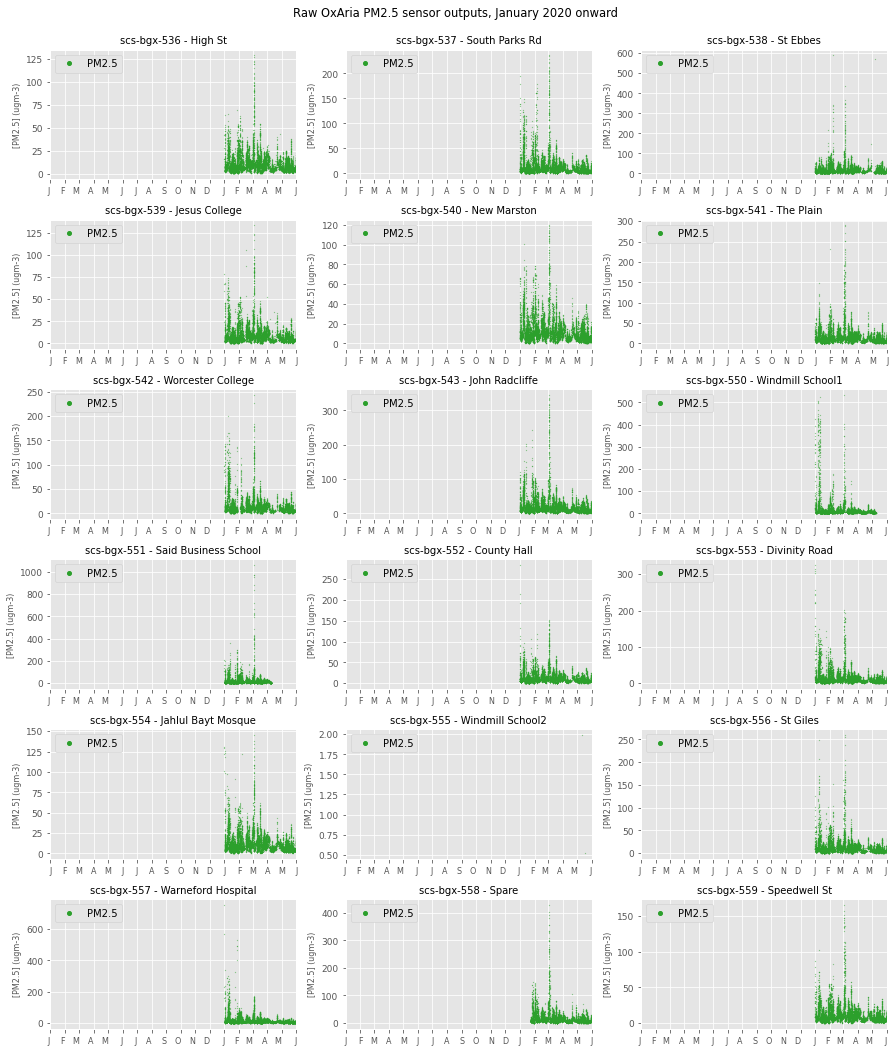

In [8]:
# PM2.5 plots
# -----------
plt.style.use('ggplot')

x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria PM2.5 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria_pm_s15.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm2p5_1', c='tab:green', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='PM2.5', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM2.5] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.2, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria0_pm25_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()

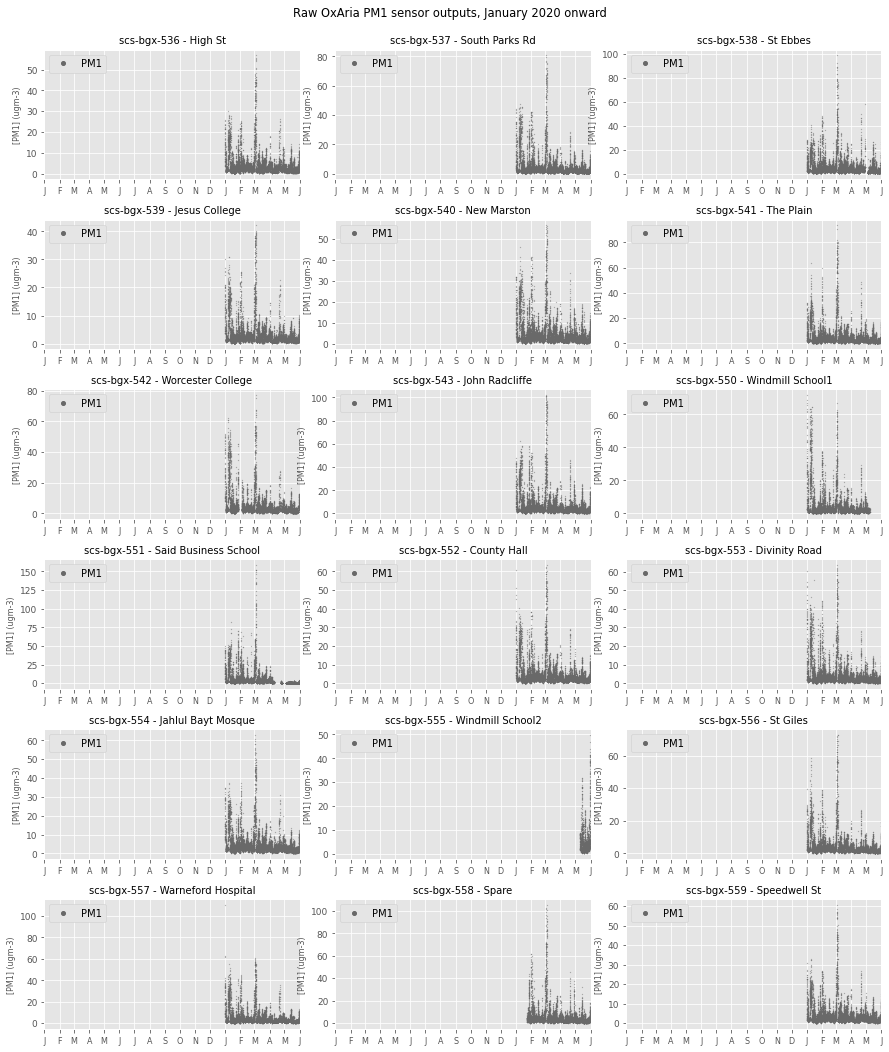

In [9]:
# PM1 plots
# -----------
plt.style.use('ggplot')

x_ticks = pd.date_range('2020-01-01', periods=18, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Raw OxAria PM1 sensor outputs, January 2020 onward',
             fontsize=11.5, y=0.91)

for tag, dat in oxaria_pm_s15.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0, inplace=True)
    t_name = dat['name'].unique()
    dat.plot(y='val.pm1', c='dimgrey', linewidth=0.5, marker='o', ms=0.2, ls='',
             label='PM1', ax=ax, legend=True, zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
    )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0.2)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[PM1] (ugm-3)', fontsize=8)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    plt.subplots_adjust(wspace=0.14, hspace=0.31)
    ax.legend(markerscale=20, frameon=True, framealpha=0.99, loc='upper left')

plt.savefig(pngs+'oxaria0_pm1_15m_raw_sensor_ts_536_q12021.png')
plt.show()

for ax in axes_list:
    ax.remove()